# EDA

Data sets:
   - Housing


Packages:
   - Seaborn
   - Matplotlib
   - Pandas

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [31]:
housing = pd.read_csv("../../../assets/AmesHousing.csv")

In [39]:
housing.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## Data Types

In [32]:
housing.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
                   ...   
Mo Sold             int64
Yr Sold             int64
Sale Type          object
Sale Condition     object
SalePrice           int64
Length: 82, dtype: object

## Missing Values

In [33]:
(
    housing
    .isna()
    .sum(axis=1)
 )

0       4
1       5
2       4
3       5
4       4
       ..
2925    5
2926    6
2927    9
2928    5
2929    4
Length: 2930, dtype: int64

In [34]:
na = (
    housing
    .isna()
    .sum()
    .rename("sum_na")
)

In [35]:
na_mask = na > 0

In [37]:
na = na[na_mask]

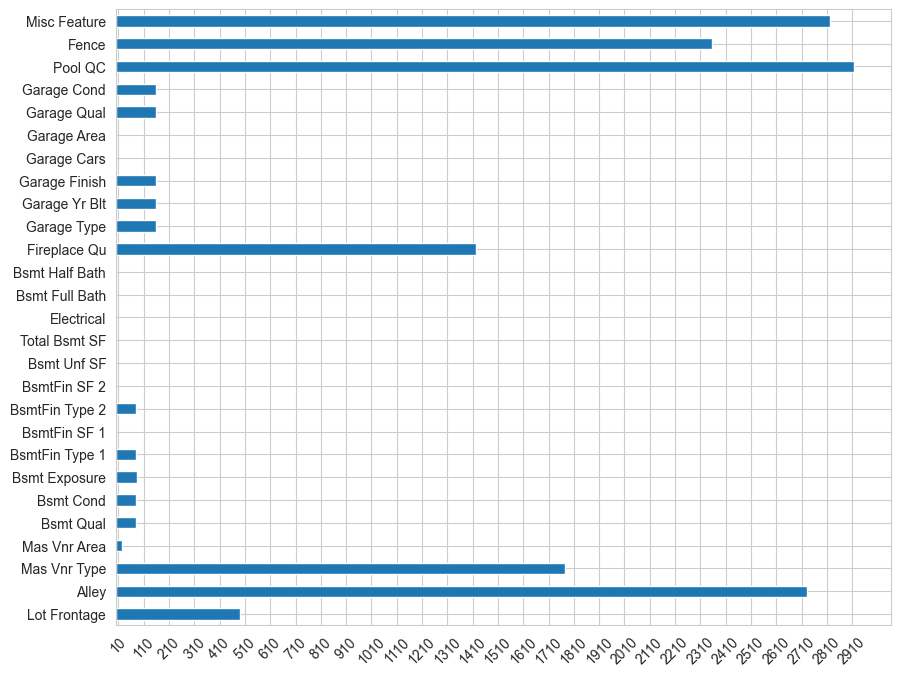

In [24]:
ax = na.plot(kind="barh")
# set figure size
ax.figure.set_size_inches(10, 8)
# set x-tick rotation 45
# _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# make x-tick start from 10 and jumps by 20
_ = ax.set_xticks(range(10, na.max(), 100))
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

## Unique Values

In [38]:
# count number of unique values per column
unique_values = (
    housing
    .nunique()
    .rename("unique_values")
    .sort_values(ascending=False)
)

In [26]:
unique_values_small = unique_values[unique_values<4]

In [27]:
unique_values_small

Paved Drive       3
Garage Finish     3
Bsmt Half Bath    3
Land Slope        3
Half Bath         3
Utilities         3
Alley             2
Street            2
Central Air       2
Name: unique_values, dtype: int64

In [28]:
housing[unique_values_small.index].dtypes

Paved Drive        object
Garage Finish      object
Bsmt Half Bath    float64
Land Slope         object
Half Bath           int64
Utilities          object
Alley              object
Street             object
Central Air        object
dtype: object

In [29]:
housing[unique_values_small.index].describe()

,Bsmt Half Bath,Half Bath
count,2928.000000,2930.000000
mean,0.061134,0.379522
std,0.245254,0.502629
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,1.000000
max,2.000000,2.000000


In [62]:
housing[unique_values_small.index]

,Paved Drive,Garage Finish,Bsmt Half Bath,Land Slope,Half Bath,Utilities,Alley,Street,Central Air
0,P,Fin,0.0,Gtl,0,AllPub,NaN,Pave,Y
1,Y,Unf,0.0,Gtl,0,AllPub,NaN,Pave,Y
2,Y,Unf,0.0,Gtl,1,AllPub,NaN,Pave,Y
3,Y,Fin,0.0,Gtl,1,AllPub,NaN,Pave,Y
4,Y,Fin,0.0,Gtl,1,AllPub,NaN,Pave,Y
...,...,...,...,...,...,...,...,...,...
2925,Y,Unf,0.0,Gtl,0,AllPub,NaN,Pave,Y
2926,Y,Unf,0.0,Mod,0,AllPub,NaN,Pave,Y
2927,Y,NaN,1.0,Gtl,0,AllPub,NaN,Pave,Y
2928,Y,RFn,0.0,Mod,0,AllPub,NaN,Pave,Y


/var/folders/c9/hdy5dxw96bv2pbcnscrcgglm0000gn/T/ipykernel_96228/395395121.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)


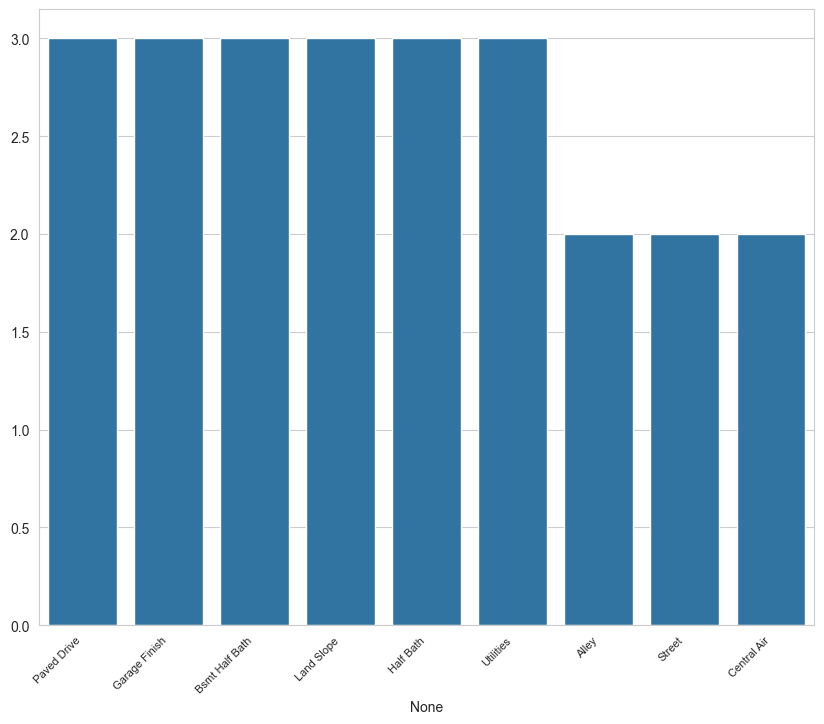

In [55]:
ax = sns.barplot(x=unique_values_small.index, y=unique_values_small.values)
# set figure size
ax.figure.set_size_inches(10, 8)
# rotate x-ticks labels 45
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=8)

In [64]:
housing.duplicated().sum()

0